## Problem 1: Use PULP to encode a linear programming problem.

This problem set will involve using a python library called PULP to formulate and solve linear programming problems.

Here is a documentation:
https://www.coin-or.org/PuLP/pulp.html
Examples are also attached in the tutorial that accompanies this week's reading materials.

As a "warm up" exercise, we are going to use pulp to solve a 
generic LP of the form 

$$ \begin{array}{rll}
\max & c_{0} x_0 + \cdots + c_{n-1} x_{n-1} \\ 
\mathsf{s.t.} & a_{0,0} x_0 + \cdots + a_{0, n-1} x_{n-1} & \leq b_0 \\ 
& \cdots & \vdots \\ 
& a_{m-1, 0} x_0 + \cdots + a_{m-1, n-1} x_{n-1} & \leq b_{m-1 } \\ 
\end{array}$$

Note that to make life easier for python programmers we will index starting from $0$. 
The LP has $n$ decision variables $x_0, \ldots, x_{n-1}$, and $m$ constraints.

The data for the problem will be given to you in the form of three lists:

`list_c` is a list of size `n` that has the objective coefficients.
~~~
list_c: [c0, ..., cn-1]
~~~

`list_a` is a list of $m$ lists where each element of `list_a` is itself a list of size $n$. 
This represents all the coefficients.

~~~
list_a : [ [ a00, a01, ...., a0,n-1], 
           [ a10, a11, ...., a1,n-1], 
           ...
           [ am-1,0, ...., am-1,n-1] ]
~~~

Finally, `list_b` is a list of size $m$ that has the RHS coefficients of each inequality. 

~~~
list_b : [ b0,..., bm-1]
~~~

Your goal is as follows: 
  - Given `list_c`, `list_a`, and `list_b`, setup the linear programming problem in Pulp, 
  - Solve it and 
  - Return the result. The result is defined by a tuple of three things: `(is_feasible, is_bounded, opt_sol)`. 
    - `is_feasible` is a Boolean that is `True` if the LP is feasible and `False` otherwise.
    - `is_bounded` is a Boolean that is `True` if the LP is bounded and `False` otherwise. The value of `is_bounded` is meaningful only if `is_feasible` is True. If `is_feasible` is `False`, this value can be arbitrary.
    - `opt_sol` is a list of `n` values for decision variables $x_0, x_1, \ldots, x_{n-1}$.
    - Note that `opt_sol` is meaningful only if `is_feasible` and `is_bounded` are both true. Failing these, the value of `opt_sol` can be arbitrary.


In [4]:
from pulp import *

def formulate_lp_problem(m, n, list_c, list_a, list_b):
    # Assert that the data is compatible.
    assert n > 0
    assert m > 0
    assert len(list_c) == n
    assert len(list_a) == len(list_b) and len(list_b) == m
    assert all(len(l) == n for l in list_a)

    # Create a LP Model 
    lpModel = LpProblem('LPProblem', LpMaximize)

    # Create all the decision variables and store all the decision variables in a list
    decision_vars = [ LpVariable(f'x{i}', None, None) for i in range(n) ] 

    # Create the objective function 
    lpModel += lpSum([list_c[i]*decision_vars[i] for i in range(n)])

    # Create all the constraints
    for i in range(m):
        lpModel += lpSum([list_a[i][j]*decision_vars[j] for j in range(n)]) <= list_b[i]

    # Solve the problem
    status = lpModel.solve()

    # Check the status of the solution
    is_feasible = status != LpStatusInfeasible
    is_bounded = status != LpStatusUnbounded
    opt_sol = [value(var) for var in decision_vars] if is_feasible and is_bounded else None

    return (is_feasible, is_bounded, opt_sol)


In [5]:
m = 4
n = 3
list_c = [1, 1, 1]
list_a = [ [2, 1, 2], [1, 0, 0], [0, 1, 0], [0, 0, -1]]
list_b = [5, 7, 9, 4]
(is_feas, is_bnded, sols) = formulate_lp_problem(m, n, list_c, list_a, list_b)
assert is_feas, 'The LP should be feasible -- your code returns infeasible'
assert is_bnded, 'The LP should be bounded -- your code returns unbounded '
print(sols)
assert abs(sols[0] - 2.0) <= 1E-04 , 'x0 must be 2.0'
assert abs(sols[1] - 9.0) <= 1E-04 , 'x1 must be 9.0'
assert abs(sols[2] + 4.0) <= 1E-04 , 'x2 must be -4.0'
print('Passed: 3 points!')

[2.0, 9.0, -4.0]
Passed: 3 points!


In [6]:
# Test 2: Unbounded problem
m = 5
n = 4 
list_c = [-1, 2, 1, 1]
list_a = [ [ 1, 0, -1, 2], [2, -1, 0, 1], [1, 1, 1, 1], [1, -1, 1, 1], [0, -1, 0, 1]]
list_b = [3, 4, 5, 2.5, 3]
(is_feas, is_bnded, sols) = formulate_lp_problem(m, n, list_c, list_a, list_b)
assert is_feas, "The LP should be feasible. But your code returns a status of infeasible."
assert not is_bnded, "The LP should be unbounded but your code returns a status of bounded."
print('Passed: 3 points')

Passed: 3 points


In [7]:
# Test 3: Infeasible problem
m = 4
n = 3
list_c = [1, 1, 1]
list_a = [ [-2, -1, -2], [1, 0, 0], [0, 1, 0], [0, 0, 1]]
list_b = [-8, 1, 1, 1]
(is_feas, is_bnded, sols) = formulate_lp_problem(m, n, list_c, list_a, list_b)
assert not is_feas, 'The LP should be infeasible -- your code returns feasible'
print('Passed: 3 points!')

Passed: 3 points!


In [8]:
# Test 4
n = 15
m = 16
list_c = [1]*n 
list_c[6] = list_c[6]+1
list_a = []
list_b = []
for i in range(n):
    lst = [0]*n
    lst[i] = -1
    list_a.append(lst)
    list_b.append(0)
list_a.append([1]*n)
list_b.append(1)
(is_feas, is_bnded, sols) = formulate_lp_problem(m, n, list_c, list_a, list_b)
assert is_feas, 'Problem is feasible but your code returned infeasible'
assert is_bnded, 'Problem is bounded but your code returned unbounded'
print(sols)
assert abs(sols[6] - 1.0)  <= 1E-03, 'Solution does not match expected one'
assert all( [abs(sols[i]) <= 1E-03 for i in range(n) if i != 6]) , 'Solution does not match expected one'
print('Passed: 3 points!')

[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
Passed: 3 points!


# Problem 2:  LP formulation for an investment problem

Welcome to the world of finance!
We are interested in investing in a portfolio of various stocks where we wish to 
maximize the overall return (profit/gain) on the investment but at the same time we do not want our investment to be diversified and the Price-to-Earnings (PE) ratio to be not too high, etc.. in order to mitigate risk.  In this problem, we will develop a portfolio using linear programming.

 - The total budget available is given to us as an input $B > 0$.
 - We are also given a set of possible stocks and the corresponding data. The data for each investment includes: 
   - Expected return of each investment.
   - The current price/unit of the stock.
   - The last earnings/unit of the stock.
   - The market category of the investment: Commodities, Tech, HealthCare
   
Your goal is to formulate a linear programming problem for the given data in order to maximize the overall expected return subject to the following constraints:
  - The total cost of the investment must be less than or equal to $B$.
  - We are only allowed by buy non-negative ($\geq 0$) amounts of each stock (short selling is not allowed). You can buy fractions of a stock (it is interesting how that works but many online trading houses let you do that).
  - The investment must be balanced:
    - The amount invested in each market category should be less than or equal to  2/3rds of the total budget.
    - The amount invested in each market category should be at least 1/6ths of the total budget. 
  - The price to earnings ratio of the overall portfolio should not exceed $15$.
  
  
### (A) Formulate on example data.

Suppose we have the following six investments with IDs 1 -6 and the data (this data is purely fictional) as shown below:

$$\begin{array}{|l|l|l|l|l|l|}
\hline
\text{ID} & \text{Stock} & \text{Price/Unit} & \text{Expected Return/Unit} & \text{Earnings/Unit} & \text{Category} \\ 
\hline 
1 & \text{IBM} & 129 & 25 & 1.9 & \text{Tech} \\ 
2 & \text{META} & 286 & 20 & 8.1 & \text{Tech} \\ 
3 & \text{Astra-Zeneca} & 72.29 & 3 &  1.5 & \text{Health} \\ 
4 & \text{Pfizer} & 38 & 1.5 & 5 & \text{Health} \\ 
5 & \text{Unilever} & 52 & 3 & 2.5 & \text{Commodities} \\ 
6 & \text{Procter-Gamble} & 148 & 4.50 & 5.2& \text{Commodities}\\
\hline
\end{array}$$

Let $x_1, \ldots, x_6$ be the decision variables wherein $x_i$ is the number of units of stock ID $i$ purchased. 
  
 Write down the expression for the objective function in terms of $x_1, \ldots, x_6$. Also, specify if we are to maximize or minimize it.

YOUR ANSWER HERE

Write down the constraint that expresses that the total cost of investment must be less than $B = 10,000$.

YOUR ANSWER HERE

Write down the constraints that the total investment in each category cannot exceed 2/3rds of the budget. You should write down three constraints one for each category.

YOUR ANSWER HERE

Write down the constraints that the total investment in each category must exceed 1/6ths of the budget. You should write down three constraints one for each category.

YOUR ANSWER HERE

Write down an expression for the price of the overall portfolio (you have already done so for one of the constraints you expressed above). Also write down an expression for the overall earnings of the portfolio.

YOUR ANSWER HERE

We wish to enforce the constraint that the overall Price/Earnings ratio of the portfolio cannot exceed 15. Write down the constraint as 

$$ \text{Price} \leq 15 \times \text{Earnings} $$

YOUR ANSWER HERE

Complete the formulation of the optimization problem in Pulp.
See the notes accompanying this weeks module for a tutorial on solving LPs using PULP. See also: 
https://machinelearninggeek.com/solving-linear-programming-using-python-pulp/

In [27]:
from pulp import *
# Create a linear programming model and set it to maximize its objective
# Read this example here: https://coin-or.github.io/pulp/CaseStudies/a_blending_problem.html
lpModel = LpProblem('InvestmentProblem', LpMaximize)
# Create a variable called x1 and set its bounds to be between 0 and infinity
x1 = LpVariable('x1', 0, None) 
# 1. Next create variables x2.. x6
# 2. Set the objective function: here is an example of how to do it. Use the 
# Create a linear programming model and set it to maximize its objective
lpModel = LpProblem('InvestmentProblem', LpMaximize)

# Create decision variables
x = [LpVariable(f'x{i}', 0, None) for i in range(1, 7)]

# Set the objective function
lpModel += 25*x[0] + 20*x[1] + 3*x[2] + 1.5*x[3] + 3*x[4] + 4.5*x[5]

# Add the constraints
B = 10000  # total budget
lpModel += 129*x[0] + 286*x[1] + 72.29*x[2] + 38*x[3] + 52*x[4] + 148*x[5] <= B  # total cost constraint

# category investment constraints
lpModel += 129*x[0] + 286*x[1] <= 2/3*B  # Tech
lpModel += 72.29*x[2] + 38*x[3] <= 2/3*B  # Health
lpModel += 52*x[4] + 148*x[5] <= 2/3*B  # Commodities

lpModel += 129*x[0] + 286*x[1] >= 1/6*B  # Tech
lpModel += 72.29*x[2] + 38*x[3] >= 1/6*B  # Health
lpModel += 52*x[4] + 148*x[5] >= 1/6*B  # Commodities

# price to earnings ratio constraint
total_price = 129*x[0] + 286*x[1] + 72.29*x[2] + 38*x[3] + 52*x[4] + 148*x[5]
total_earnings = 1.9*x[0] + 8.1*x[1] + 1.5*x[2] + 5*x[3] + 2.5*x[4] + 5.2*x[5]
lpModel += total_price <= 15 * total_earnings

# Solve the model and print the solutions
lpModel.solve()
for v in lpModel.variables():
    print(v.name, "=", v.varValue)
print("Objective value = ", value(lpModel.objective))


x1 = 33.830665
x2 = 0.0
x3 = 0.0
x4 = 104.45204
x5 = 32.051282
x6 = 0.0
Objective value =  1098.598531


In [28]:
assert  abs(value(lpModel.objective) - 1098.59) <= 0.1, "Test failed" 

## Problem 3: Optimal Transport

Suppose we have piles of different sizes of raw material at various locations in a worksite. 

The piles of raw material are  given as follows:

$$\begin{array}{|l|l|l|}
\hline
\text{ID} & \text{Coordinates} & \text{Weight} \\ 
\hline 
0 & (x_0, y_0) & W_0 \\ 
1 & (x_1, y_1) & W_1 \\ 
 & \vdots & \\ 
n-1 & (x_{n-1}, y_{n-1}) & W_{n-1} \\ 
\hline
\end{array}$$

We need to plan to redistribute this pile to a new configuration that is also given 
in terms of the desired coordinates and weights.

$$\begin{array}{|l|l|l|}
\hline
\text{ID} & \text{Coordinates} & \text{Weight} \\ 
\hline 
0 & (x'_0, y'_0) & W'_0 \\ 
1 & (x'_1, y'_1) & W'_1 \\ 
 & \vdots & \\ 
m-1 & (x'_{m-1}, y'_{m-1}) & W'_{m-1} \\ 
\hline
\end{array}$$

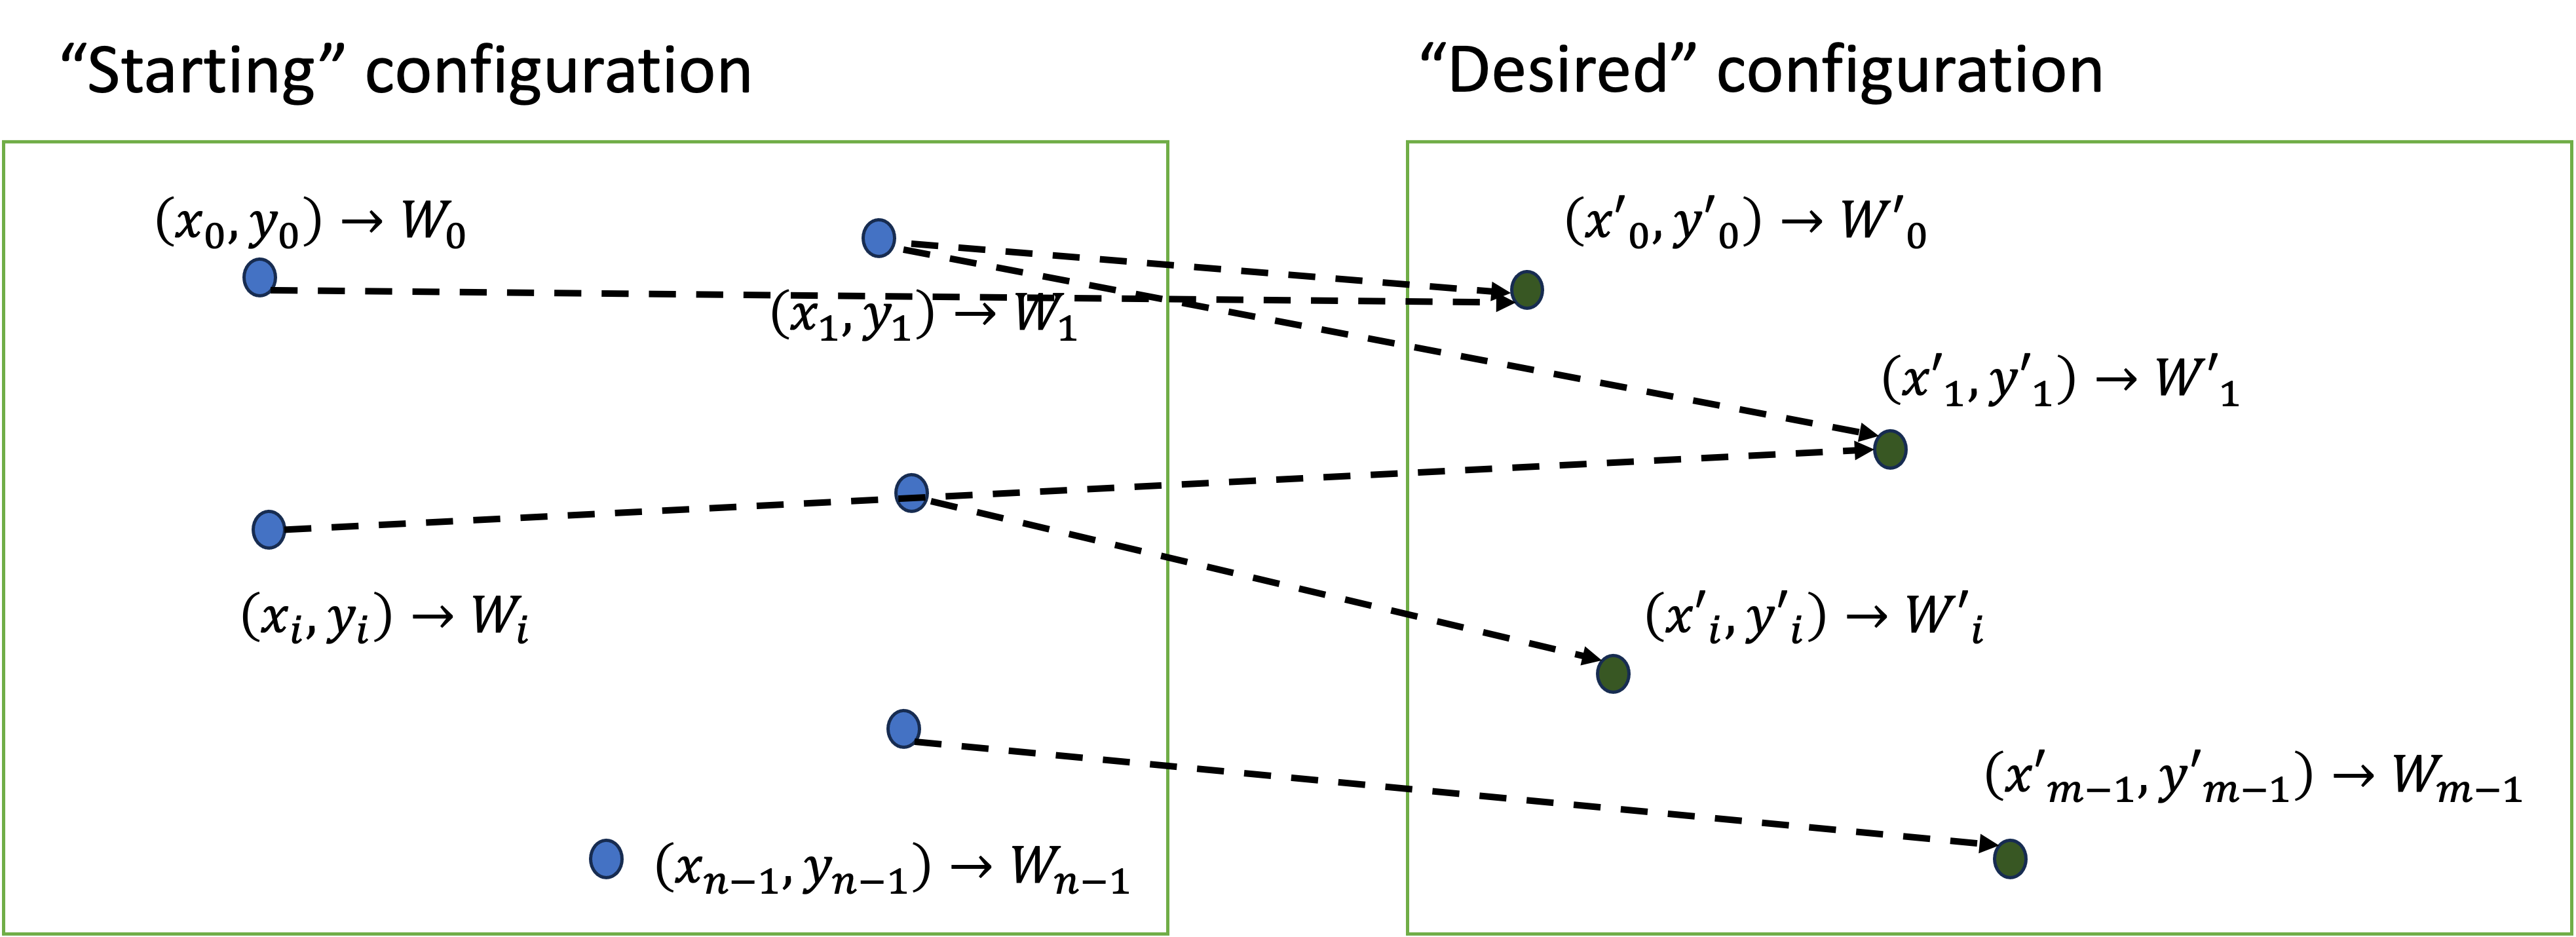

### Example

As an example, consider the following data showing the starting configuration:
$$\begin{array}{|l|l|l|}
\hline
\text{ID} & \text{Coordinates} & \text{Weight} \\ 
\hline 
0 & (1, 5) & 9 \\ 
1 & (4, 1) & 4 \\ 
2 & (5, 5) & 5 \\ 
\hline
\end{array}$$

We wish to distribute the input pile so that we have the following output:
$$\begin{array}{|l|l|l|}
\hline
\text{ID} & \text{Coordinates} & \text{Weight} \\ 
\hline 
0 & (2, 2) & 9 \\ 
1 & (6, 6) & 9 \\  
\hline
\end{array}$$

## Optimal Transport Problem

The cost of moving $w$ units of material from location $(x, y)$ to target location 
$(x', y')$ is given by 

$$ w \times \sqrt{ (x-x')^2 + (y - y')^2 } $$

Our goal is to come up with a _transportation plan_ that minimizes the overall cost of moving raw materials from a starting configuration to an ending configuration.

### Example

Going back to our example, here is a transportation plan: 
  - Move 5 units of raw material from (5,5) (location id 2) to (6,6) (target location id 1).
    This incurs a cost of $5 \times \sqrt{ 1^2 + 1^2} = 5 \sqrt{2}$ units.
  - Move 4 units of raw material from $(4,1)$ to $(6,6)$. This incurs a cost of $4\sqrt{29}$ units.
  - Move 9 units from (1,5) to (2,2). Cost is $9\sqrt{10}$
The total cost of our plan is $5 \sqrt{2} + 4 \sqrt{29} + 9 \sqrt{10} \approx 57.072$ units. 

The question is whether we can do better than this?

## Linear Program Formulation

To evolve a linear programming formulation, first let's identify the decision variables. 

 Let $x_{i,j}$ denote the amount of material transported from source location $i$ to target location $j$. Since $0 \leq i \leq n-1$ and $0 \leq j \leq m-1$, there are $m \times n$ such decision variables.
 
 Clearly $x_{i,j} \geq 0$ since it does not make any sense to transport negative amount of material.
 
Let $D_{i,j}$ denote the distance from source location $i$ to destination location $j$.

$$ D_{i,j} = \sqrt{ (x_i - x'_j)^2 + (y_i - y'_j)^2 } \,.$$

Write down the objective function in terms of $x_{i,j}$ and $D_{i,j}$ for $1 \leq i \leq n$ and $1 \leq j \leq m$. Also indicate if we are going to maximize or minimize it.

YOUR ANSWER HERE

Next for each source location $i$, the total amount of material transported _from_ $i$ to various destination locations must sum up to $w_i$ : the total weight of material at location $i$. Write down a constraint to enforce this.

YOUR ANSWER HERE

Next for each destination location $j$ , the total amount of material transported _to_ $j$ from various source locations must sum up to $w'_j$ : the total weight of material at destination location $j$. Write down a constraint to enforce this.

YOUR ANSWER HERE

Formulate your optimization problem and return the optimal solution for given problem data:
  - `source_coords`: List of (x,y) pairs of coordinates for the source locations.
  - The size of the list is the number of source locations $n$.
  - `source_weights`: List of $w_i$ weights for the source location.
  - The size of the list equals number of source locations $n$ and $i^{th}$ element of this list is the weight corresponding to the $i^{th}$ coordinate in the list `source_coords`.
    
Similarly we have two lists `dest_coords` and `dest_weights`. Note that `sum(source_weights)` must equal `sum(dest_weights)`.

Your function should return the solution as a list of lists `sol` wherein `sol[i][j]` indicates the amount of material transported from source location `i` to destination location `j`.

### Example

For instance, suppose our solution was as follows (here $n = 3, m = 4$):
 $$ \begin{array}{c}
   x_{0,0} = 0, x_{0,1} = 5, x_{0,2} = 7, x_{0,3} = 0 \\
    x_{1,0} = 1, x_{1,1} = 4, x_{1,2} = 4, x_{1,3} = 4 \\ 
    x_{2,0} = 4, x_{2,1} = 5, x_{2,2} = 5, x_{2,3}  = 5 \\ 
    \end{array}$$
    
```
[ [0, 5, 7, 0], 
  [1, 4, 4, 4], 
  [4, 5, 5, 5] 
 ]
```


In [17]:
from math import sqrt
def calculate_distance(a, b):
    (xa, ya) = a
    (xb, yb) = b
    return sqrt( (xa- xb)**2 + (ya - yb)**2)
    
def get_objective(var_values, source_coords, dest_coords):
    # A useful function for our test cases: please do not modify
    # It should help you in your code however to see how we calculate the objective function
    obj = sum([ var_values[i][j] * calculate_distance(source_coords[i], dest_coords[j])  for i in range(n) for j in range(m)  ])
    return obj 

def calculate_optimal_transport_plan(source_coords, source_weights, dest_coords, dest_weights):
    n = len(source_coords)
    assert (n== len(source_weights))
    m = len(dest_coords)
    assert (m == len(dest_weights))
    assert( sum(source_weights) == sum(dest_weights)) 

    #1. Create the LP model
    model = LpProblem("OptimalTransportPlan", LpMinimize)

    #2. Create a list of decision variables : x_{i,j} for i in range(n) and for j in range(m)
    x = [[LpVariable(f"x_{i}_{j}", 0) for j in range(m)] for i in range(n)]

    #3. Add the objective function
    model += lpSum([x[i][j] * calculate_distance(source_coords[i], dest_coords[j]) for i in range(n) for j in range(m)])

    #4. Add the constraints
    for i in range(n):
        model += lpSum([x[i][j] for j in range(m)]) == source_weights[i]
    for j in range(m):
        model += lpSum([x[i][j] for i in range(n)]) == dest_weights[j]

    #5. Solve and extract the solution/return it back in the required form to pass test cases
    model.solve()
    solution = [[x[i][j].varValue for j in range(m)] for i in range(n)]
    return solution
    
            

In [18]:
#Let's compute the solution for our example
source_coords = [ (1,5), (4,1), (5,5) ]
source_weights = [9, 4, 5]
dest_coords = [ (2,2), (6,6) ]
dest_weights = [9, 9]
n = 3
m = 2
var_values = calculate_optimal_transport_plan(source_coords, source_weights, dest_coords, dest_weights)
obj_val = get_objective(var_values, source_coords, dest_coords)
print(f'Objective value: {obj_val}')
## Check the solution
for i in range(n):
    assert ( sum(var_values[i][j] for j in range(m) ) == source_weights[i] )
for j in range(m):
    assert (sum(var_values[i][j] for i in range(n)) == dest_weights[j])

assert(abs(obj_val - 52.22) <= 1E-01)
print('Test Passed: 10 points')

Objective value: 52.22280607707767
Test Passed: 10 points


In [19]:
#Let's compute the solution for our example
source_coords = [ (1,1), (2,2), (3,3), (4, 4), (5,5), (6,6) ]
source_weights = [10, 10, 10, 10, 10, 10]
dest_coords = [ (6,1), (5, 2), (4,3), (3,2), (2,1) ]
dest_weights = [12, 12, 12, 12, 12]
n = 6
m = 5
var_values = calculate_optimal_transport_plan(source_coords, source_weights, dest_coords, dest_weights)
obj_val = get_objective(var_values, source_coords, dest_coords)
print(f'Objective value: {obj_val}')
## Check the solution
for i in range(n):
    assert ( sum(var_values[i][j] for j in range(m) ) == source_weights[i] )
for j in range(m):
    assert (sum(var_values[i][j] for i in range(n)) == dest_weights[j])
assert(abs(obj_val - 127.19) <= 1E-1)
print('Test Passed: 8 points')

Objective value: 127.19048316123448
Test Passed: 8 points


In [20]:
#Let's compute the solution for our example
source_coords = [ (i,1) for i in range(20) ]
source_weights = [10] * 20
dest_coords = [ (6,i+5) for i in range(8) ] + [ (14,i+5) for i in range(8) ] 
dest_weights = [12.5]*16
n = 20
m = 16
var_values = calculate_optimal_transport_plan(source_coords, source_weights, dest_coords, dest_weights)
obj_val = get_objective(var_values, source_coords, dest_coords)
print(f'Objective value: {obj_val}')
## Check the solution
for i in range(n):
    assert ( sum(var_values[i][j] for j in range(m) ) == source_weights[i] )
for j in range(m):
    assert (sum(var_values[i][j] for i in range(n)) == dest_weights[j])
assert(abs(obj_val - 1598.11) <= 1E-1)
print('Test Passed: 5 points')

Objective value: 1598.1136673805286
Test Passed: 5 points


## Problem 3B (Optimal Pricing Model)

Let us consider a variant of the optimal transportation problem where we have the same data including the starting and desired configurations. 
  - **Source** locations given as coordinates and weights : $(x_i, y_i), w_i$, $i = 1, \ldots,n$.
  - **Target** locations given as coordinates and weights: $(x_j', y_j'), w_j'$, $j = 1, \ldots, m$.
  
The cost of transporting a unit weight from source location $i$ to target location $j$ 
is given by the Euclidean distance:
$$ D_{i,j}:\ \sqrt{ (x_i - x'_j)^2 + (y_i - y'_j)^2 }$$

Instead of deriving the transportation plan, we will focus on setting purchase/sale prices at the source and target locations respectively.  

Suppose, we are allowed to set prices at the source and target locations for the material such that at each source location $i$ we set a price $p_i$ per unit of the material and at each target location $j$, we set a price $p'_j$ per unit of the material.  However, we cannot set the prices arbitrarily. We have to follow the following constraint:
 
   - For each source location $i$ and target location $j$ the price difference $p'_j - p_i$ must be less than or equal to $D_{i,j}$.
   
Although this constraint sounds strange, it can be justified from economic arguments. Imagine for some source $i$ and destination $j$, we have $p'_j - p_i > D_{i,j}$ (we are making a strictly positive profit). Then a competitor can undercut us by buying at a higher price and/or selling at a lower price and thus take the business away from us. Perhaps, we try to undercut the competitor until finally, we have jointly driven the prices down to satisfy $p'_j - p_i \leq D_{i,j}$.

Once the prices have been setup at the source and target locations, the revenue we earn by transporting goods is given by 

$$  \sum_{j=1}^m p'_j w'_j  - \sum_{i=1}^n p_i w_i  $$

The first term is what we get by selling at the target location and the second term is what we get from buying at the source locations. 

Formulate a LP that will set prices so that we maximize the revenue while satisfying the "economic" constraint above. 

Problem data is same as before:
  - `source_coords`: List of (x,y) pairs of coordinates for the source locations.
  - The size of the list is the number of source locations $n$.
  - `source_weights`: List of $w_i$ weights for the source location.
  - The size of the list equals number of source locations $n$ and $i^{th}$ element of this list is the weight corresponding to the $i^{th}$ coordinate in the list `source_coords`.
    
Similarly we have two lists `dest_coords` and `dest_weights`. Note that `sum(source_weights)` must equal `sum(dest_weights)`.

Your function should return the solution as pair of  two lists: (`source_prices`, `target_prices`).
`source_prices` should have length `n` and `target_prices` should have length `m`.

In [21]:
from pulp import *
from math import sqrt

def calculate_distance(a, b):
    (xa, ya) = a
    (xb, yb) = b
    return sqrt((xa - xb)**2 + (ya - yb)**2)

def compute_optimal_prices(source_coords, source_weights, dest_coords, dest_weights):
    n = len(source_coords)
    assert (n == len(source_weights))
    m = len(dest_coords)
    assert (m == len(dest_weights))
    assert (sum(source_weights) == sum(dest_weights))

    # Define LP model
    lpModel = LpProblem('Transportation', LpMaximize)

    # Define decision variables
    source_vars = [LpVariable(f"p_{i}", lowBound=0) for i in range(n)]
    dest_vars = [LpVariable(f"p'_{j}", lowBound=0) for j in range(m)]

    # Define objective function
    lpModel += sum(dest_vars[j] * dest_weights[j] for j in range(m)) - sum(source_vars[i] * source_weights[i] for i in range(n))

    # Add constraints
    for i in range(n):
        for j in range(m):
            lpModel += dest_vars[j] - source_vars[i] <= calculate_distance(source_coords[i], dest_coords[j])

    lpModel.solve()
    source_prices = [v.varValue for v in source_vars]
    dest_prices = [v.varValue for v in dest_vars]
    return (source_prices, dest_prices)

In [22]:
#Let's compute the solution for our example
source_coords = [ (1,5), (4,1), (5,5) ]
source_weights = [9, 4, 5]
dest_coords = [ (2,2), (6,6) ]
dest_weights = [9, 9]
n = 3
m = 2
(source_prices, dest_prices) = compute_optimal_prices(source_coords, source_weights, dest_coords, dest_weights)
profit = sum([pi*wi for (pi, wi) in zip(dest_prices, dest_weights)]) - sum([pj*wj for (pj, wj) in zip(source_prices, source_weights)])
assert(abs(profit - 52.22) <= 1E-01), f'Error: Expected profit is {52.22} obtained: {profit}'
print('Test Passed: 7 points')

Test Passed: 7 points


In [23]:
#Let's compute the solution for our example
source_coords = [ (i,1) for i in range(20) ]
source_weights = [10] * 20
dest_coords = [ (6,i+5) for i in range(8) ] + [ (14,i+5) for i in range(8) ] 
dest_weights = [12.5]*16
n = 20
m = 16
(src_prices, dest_prices) = compute_optimal_prices(source_coords, source_weights, dest_coords, dest_weights)
profit = sum([pi*wi for (pi, wi) in zip(dest_prices, dest_weights)]) - sum([pj*wj for (pj, wj) in zip(src_prices, source_weights)])
assert(abs(profit - 1598.11) <= 1E-1), f'Error: Expected profit is {1598.11} obtained: {profit}'
print('Test Passed: 8 points')

Test Passed: 8 points


## That's All Folks!